# Data visualization for clients-month in 2019-2023


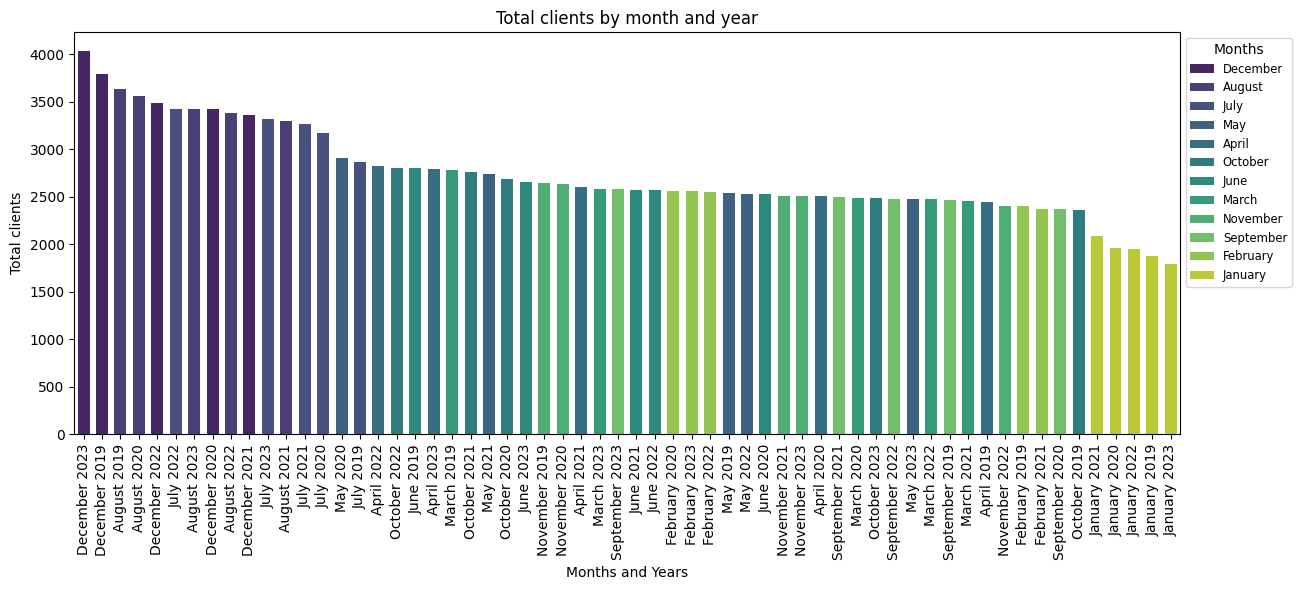

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv('dataset_restaurant_19_23.csv', sep=';')

# group data by month and year, calculating the sum of total clients in that month
df_monthly_sum = df.groupby(['Year', 'Month']).agg({'Clients': 'sum'}).reset_index()

# order the dataset based on the total sum of clients by month and year
df_monthly_sum = df_monthly_sum.sort_values(by='Clients', ascending=False)

# create the barplot
plt.figure(figsize=(12, 6)) # size of my barplot
sns.barplot(x=df_monthly_sum['Month'] + ' ' + df_monthly_sum['Year'].astype(str), # month+year plot on x axis / astype = transform 'Year' from int to string, in order to concatenate month (str) with year (int)
            y=df_monthly_sum['Clients'], # monthly total of clients plot on y axis
            hue=df_monthly_sum['Month'], # assign a color at each month
            palette='viridis', # palette of colors
            width=0.65, # width of the bins
            legend=True) # show the legend

# axis labels
plt.xlabel('Months and Years')
plt.ylabel('Total clients')

# barplot title
plt.title('Total clients by month and year')

# customize x ticks
plt.xticks(rotation=90, ha='center') # rotation = rotation of the tick / ha = position of the month+year respect to the tick
plt.tight_layout()

# customize legend
plt.legend(title='Months', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', title_fontsize='medium')

# show the barplot
plt.show()


# N.N with keras


In [ ]:
# import the libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# function used to modify the initial dataset
def modify_dataset(dataset, day_columns, boolean_column_holiday, boolean_column_vacation, month_column):
    day_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

    # create dummy columns for each day of week (one hot encoding)
    for day in day_of_week:
        dataset[day] = (dataset[day_columns] == day).astype(int) # new dataset with day name column -> day name column == day name into old dataset -> transform bool value into int value

    # drop the initial columns "Day" from the dataset
    dataset.drop(columns=[day_columns], inplace=True) # inplace=True to modify directly my dataset

    # transform the boolean columns holiday
    dataset[boolean_column_holiday] = dataset[boolean_column_holiday].astype(int) # astype(int) transform the boolean variable into the "Holiday" columns => False in 0 and True in 1

    # transform the boolean columns vacation
    dataset[boolean_column_vacation] = dataset[boolean_column_vacation].astype(int) # astype(int) transform the boolean variable into the "Vacation" columns => False in 0 and True in 1

    # create dummy columns for each month (one hot encoding)
    for month in months:
        dataset[month] = (dataset[month_column] == month).astype(int) # new dataset with month name column -> month name column == month name into old dataset -> transform bool value into int value

    # drop the initial columns "Month" from my dataset
    dataset.drop(columns=[month_column], inplace=True) # inplace=True to modify directly my dataset

    return dataset

# function used to reconvert the dummy columns and "Vacation", "Holiday" columns
def convert_dummy_columns(dataset):
    day_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

    # create the new column "Day" with the corresponding day of the week
    dataset['Day'] = dataset[day_of_week].idxmax(axis=1) # select all dummy day columns -> for each raw select columns with max value -> put into columns 'Day' the name of columns with max value

    # remove day's dummy columns
    dataset.drop(columns=day_of_week, inplace=True) # inplace=True to modify directly my dataset

    # create the new column "Month" with the corresponding month
    dataset['Month'] = dataset[months].idxmax(axis=1) # select all dummy month columns -> for each raw select columns with max value -> put into columns 'Month' the name of columns with max value

    # remove month's dummy columns
    dataset.drop(columns=months, inplace=True) # inplace=True to modify directly my dataset

    # transform boolean columns "Vacation" and "Holiday"
    dataset['Vacation'] = dataset['Vacation'].astype(bool) # astype(int) transform the int variable into the "Vacation" columns => 0 in False and 1 in True
    dataset['Holiday'] = dataset['Holiday'].astype(bool) # astype(int) transform the int variable into the "Holiday" columns => 0 in False and 1 in True

    # reorganize the column's order
    new_order = ['Date', 'Year','Day', 'Month', 'Holiday', 'Vacation'] + [col for col in dataset.columns if col not in ['Date', 'Year', 'Day', 'Month', 'Holiday', 'Vacation']] # concatate the columns in the list with the columns that are not present in the list
    dataset = dataset[new_order]

    return dataset

#---------------------------------------------- MAIN --------------------------------------------------

#---------------------------------------------- 2019-2023 --------------------------------------------------

# read the dataset 2019-2023
dataset = pd.read_csv('dataset_restaurant_19_23.csv',sep=';')

# i modify the dataset 2019-2023 using the function
dataset_19_23_modify = modify_dataset(dataset, 'Day', 'Holiday', 'Vacation', 'Month')

# featueres
features = dataset_19_23_modify.drop(columns=['Date', 'Clients', 'Year']) # drop 'Clients','Date' and 'Year' because they aren't featuers

# labels
labels = dataset_19_23_modify['Clients']

# divide the dataset in train set (features) and test set (labels)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=None) # i have a random divison of dataset at each start of the program (random_state=None)

# create the N.N with keras
model = Sequential()
model.add(Dense(X_train.shape[1], activation='relu')) # number of neuron in input layer = number of features (X_train.shape[1])
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear')) # number of neuron in output layer equal to 1 because it's a regression problem

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# train the model
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

# metrics
score = model.evaluate(X_test, y_test) # evaluete the test loss
print('Test Loss:', score) # print the model test loss

#---------------------------------------------- 2024 --------------------------------------------------

# read the dataset for 2024
dataset_2024 = pd.read_csv('dataset_restaurant_2024.csv',sep=';')

# i modify the dataset 2024 using the function
dataset_2024_modify = modify_dataset(dataset_2024, 'Day', 'Holiday', 'Vacation', 'Month')

# i take as features all the columns except 'Date' and 'Year'
features_2024 = dataset_2024_modify.drop(columns=['Date', 'Year'])

# the model perform the predictions
predictions_2024 = model.predict(features_2024)

# adding the predictions to the dataset
dataset_2024_modify['predicted_clients'] = np.round(predictions_2024,0) # using 'round' to delete decimal numbers

# set the negative value of 'predicted_clients' to zero
dataset_2024_modify['predicted_clients'] = dataset_2024_modify['predicted_clients'].apply(lambda x: max(0, x))

# i obtain the final dataset without dummy columns and int value in "Vacation" and "Holiday" columns
dataset_2024_final = convert_dummy_columns(dataset_2024_modify)

# create a .csv file with the predicted clients
dataset_2024_final.to_csv('predicted_clients_2024.csv')

# Data visualization for predicted clients in 2024

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# read the dataset
df = pd.read_csv('predicted_clients_2024.csv')

# group data by month, calculating the sum of total clients in that month
df_monthly_sum = df.groupby(['Month']).agg({'predicted_clients': 'sum'}).reset_index()

# order the dataset based on the total sum of clients by month and year
df_monthly_sum = df_monthly_sum.sort_values(by='predicted_clients', ascending=False)

# create the barplot
plt.figure(figsize=(12, 6)) # size of my barplot
sns.barplot(x=df_monthly_sum['Month'], # month plot on x axis
            y=df_monthly_sum['predicted_clients'], # monthly total of predicted clients plot on y axis
            hue=df_monthly_sum['Month'], # assign a color at each month
            palette='viridis', # palette of colors
            width=0.65, # width of the bins
            legend=True) # show the legend

# axis labels
plt.xlabel('Months')
plt.ylabel('Total predicted clients')

# barplot title
plt.title('Predicted clients by month for 2024')

# customize x ticks
plt.xticks(ha='center') # ha = position of the month+year respect to the tick
plt.tight_layout()

# customize legend
plt.legend(title='Months', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small', title_fontsize='medium')

# show the barplot
plt.show()
